<a href="https://colab.research.google.com/github/NiceSoyce/DS_Lab2/blob/main/robert_thibault_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse en Composantes Principales (ACP)

In [30]:
# Imports globaux pour tout le projet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits
from mpl_toolkits.mplot3d import Axes3D

## Partie 1 : Analyse du dataset *decathlon*

---
### 1. Préparation des donneés

**1. Variables quantitatives à inclure dans l’analyse :**

- 100m  
- Long.jump  
- Shot.put  
- High.jump  
- 400m  
- 110m.hurdle  
- Discus  
- Pole.vault  
- Javeline  
- 1500m  
- Points  

Les colonnes `Athlets`, `Rank`, et `Competition` ne sont pas quantitatives continues :  
- `Athlets` et `Competition` sont qualitatives (noms, catégories).  
- `Rank` est un rang (ordinal, mais pas une mesure de performance continue).

---

**2. Vérifier si les données nécessitent un centrage et une réduction :**

Oui, il faut centrer et réduire les variables quantitatives.  
**Pourquoi ?**  
Les variables sont mesurées dans des unités différentes (secondes, mètres, points, etc.). Sans standardisation, les variables à grande échelle (ex : Points, 1500m) domineraient l’analyse.

---

**3. Justification des choix :**

- On sélectionne uniquement les variables quantitatives continues pour l’ACP, car l’ACP analyse les corrélations entre variables numériques.
- On centre et réduit les données pour donner le même poids à chaque variable, quelle que soit son unité ou son échelle.

---

### 2. Initialisation du ACP

Matrice de covariance A :
 [[ 1.025      -0.61364461 -0.36539432 -0.25240925  0.53330561  0.59438615
  -0.22725026 -0.08460025 -0.16169011 -0.06206012 -0.70137924]
 [-0.61364461  1.025       0.18788697  0.30201055 -0.61711418 -0.51804534
   0.19916784  0.20911447  0.12275291 -0.03452828  0.74326327]
 [-0.36539432  0.18788697  1.025       0.50144182 -0.14189374 -0.25790611
   0.6311623   0.0627114   0.3843294   0.11869813  0.6430741 ]
 [-0.25240925  0.30201055  0.50144182  1.025      -0.19265585 -0.29037132
   0.3784488  -0.16008526  0.17617709 -0.04602508  0.59112074]
 [ 0.53330561 -0.61711418 -0.14189374 -0.19265585  1.025       0.56168745
  -0.12082635 -0.08127478  0.0043379   0.41830909 -0.68361345]
 [ 0.59438615 -0.51804534 -0.25790611 -0.29037132  0.56168745  1.025
  -0.33435598 -0.00277148  0.00896183  0.03847875 -0.66057171]
 [-0.22725026  0.19916784  0.6311623   0.3784488  -0.12082635 -0.33435598
   1.025      -0.15382421  0.16183704  0.26462948  0.49628753]
 [-0.08460025  0.20

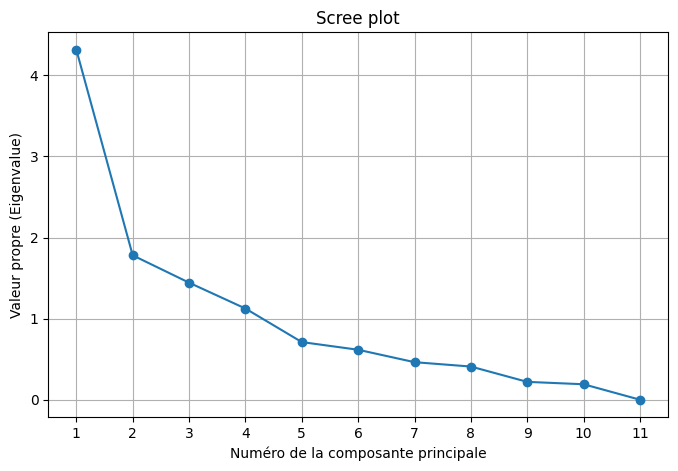

In [46]:
# Charger les données
df = pd.read_csv("decathlon.csv")

# Sélectionner les variables quantitatives
quant_vars = ['100m', 'Long.jump', 'Shot.put', 'High.jump', '400m', '110m.hurdle',
              'Discus', 'Pole.vault', 'Javeline', '1500m', 'Points']
X = df[quant_vars]

# Centrer et réduire les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réaliser l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculer la matrice de covariance A à partir des données centrées-réduites
A = np.cov(X_scaled, rowvar=False)
print("Matrice de covariance A :\n", A)

# Calculer les valeurs propres et vecteurs propres de la matrice de covariance
eigvals, eigvecs = np.linalg.eig(A)
print("\nValeurs propres :\n", eigvals)
print("\nVecteurs propres (colonnes) :\n", eigvecs)

# Affichage détaillé des valeurs propres et vecteurs propres associés
for i in range(len(eigvals)):
    print(f"\nComposante principale {i+1} :")
    print(f"  Valeur propre : {eigvals[i]}")
    print(f"  Vecteur propre : {eigvecs[:, i]}")

# Trier les valeurs propres et les vecteurs propres associés par ordre décroissant
idx_sorted = np.argsort(eigvals)[::-1]  # indices pour trier en décroissant
eigvals_sorted = eigvals[idx_sorted]
eigvecs_sorted = eigvecs[:, idx_sorted]
print("\nValeurs propres triées (ordre décroissant) :\n", eigvals_sorted)
#print("\nVecteurs propres triés (colonnes) :\n", eigvecs_sorted)

# Scree plot (graphique en écailles) des valeurs propres de la matrice de covariance A
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(eigvals_sorted) + 1), eigvals_sorted, marker='o', linestyle='-')
plt.title("Scree plot")
plt.xlabel("Numéro de la composante principale")
plt.ylabel("Valeur propre (Eigenvalue)")
plt.xticks(range(1, len(eigvals_sorted) + 1))
plt.grid(True)
plt.show()

On voit d'après le graphique que le poids des composantes au-delà de 4 est relativement faible. 4 CPs nous sont suffisants pour avoir la majorité de la variance. 

### 3. Analyse de l'inertie

In [32]:
# Analyse de l'inertie expliquée par chaque axe principal
explained_var = pca.explained_variance_ratio_ * 100  # en pourcentage
cumulative_var = np.cumsum(explained_var)

# Affichage du pourcentage de variance expliquée par axe et cumulée
for i, (var, cum_var) in enumerate(zip(explained_var, cumulative_var), 1):
    print(f"Axe {i}: {var:.2f}% (cumulé: {cum_var:.2f}%)")

Axe 1: 38.28% (cumulé: 38.28%)
Axe 2: 15.79% (cumulé: 54.07%)
Axe 3: 12.80% (cumulé: 66.88%)
Axe 4: 9.97% (cumulé: 76.85%)
Axe 5: 6.31% (cumulé: 83.15%)
Axe 6: 5.46% (cumulé: 88.62%)
Axe 7: 4.11% (cumulé: 92.73%)
Axe 8: 3.63% (cumulé: 96.35%)
Axe 9: 1.95% (cumulé: 98.31%)
Axe 10: 1.69% (cumulé: 100.00%)
Axe 11: 0.00% (cumulé: 100.00%)


### 4. Étude des variables

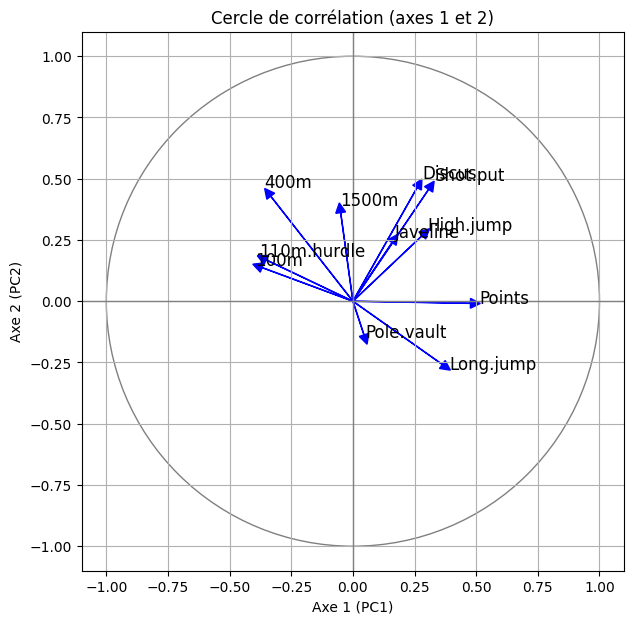

In [33]:
# Interprétation de la contribution des variables aux axes principaux
# Les coefficients des vecteurs propres (ou "loadings") indiquent la contribution de chaque variable à chaque axe principal
#Ajouter un exemple d'interprétation avec le CP1

# Cercle de corrélation pour les deux premiers axes principaux
plt.figure(figsize=(7, 7))
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
plt.gca().add_artist(circle)

# On utilise les deux premiers vecteurs propres triés (composantes principales)
for i, var in enumerate(quant_vars):
    x = eigvecs_sorted[i, 0]
    y = eigvecs_sorted[i, 1]
    plt.arrow(0, 0, x, y, head_width=0.04, head_length=0.04, fc='b', ec='b')
    plt.text(x * 1.08, y * 1.08, var, fontsize=12)

plt.xlabel("Axe 1 (PC1)")
plt.ylabel("Axe 2 (PC2)")
plt.title("Cercle de corrélation (axes 1 et 2)")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.show()

# Interprétation :
# - Les variables proches du cercle et éloignées de l'origine sont bien représentées par les deux premiers axes.
# - Les variables proches les unes des autres sont corrélées.
# - Les variables opposées sont anticorrélées.
# - Les variables proches d'un axe sont bien représentatives de cet axe.

# Pour identifier les groupes de variables corrélées et les variables les plus représentatives de chaque axe,
# il suffit de regarder les directions similaires (corrélées) ou opposées (anticorrélées) sur le cercle.

### 5. Étude des variables

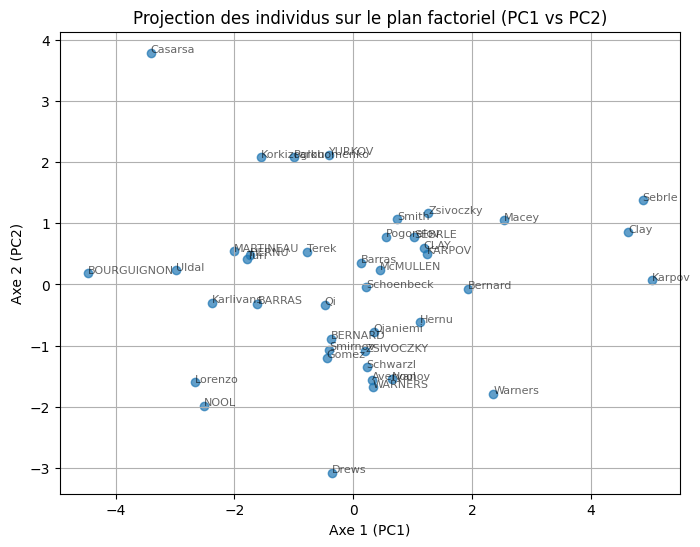

Individus qui contribuent le plus à l'axe 1 (PC1) :
Karpov (14.63%)
Sebrle (13.76%)
Clay (12.40%)
BOURGUIGNON (11.56%)
Casarsa (6.73%)

Individus qui contribuent le plus à l'axe 2 (PC2) :
Casarsa (20.15%)
Drews (13.30%)
YURKOV (6.30%)
Parkhomenko (6.06%)
Korkizoglou (6.06%)


In [34]:
# Analyse de la position des individus dans les plans factoriels (ACP)
# On projette les individus sur les deux premiers axes principaux

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
for i, name in enumerate(df["Athlets"]):
    plt.text(X_pca[i, 0], X_pca[i, 1], name, fontsize=8, alpha=0.6)

plt.xlabel("Axe 1 (PC1)")
plt.ylabel("Axe 2 (PC2)")
plt.title("Projection des individus sur le plan factoriel (PC1 vs PC2)")
plt.grid(True)
plt.show()

# Identifier les regroupements ou oppositions :
# - Les individus proches sur le graphique sont similaires selon les variables retenues.
# - Les groupes d'individus forment des clusters (regroupements).
# - Les individus opposés sur un axe ont des profils très différents sur la composante principale correspondante.

# Déterminer les individus qui contribuent le plus à chaque axe :
# Contribution = (coordonnée sur l'axe)^2 / somme des (coordonnées sur l'axe)^2
contrib_PC1 = (X_pca[:, 0] ** 2) / np.sum(X_pca[:, 0] ** 2)
contrib_PC2 = (X_pca[:, 1] ** 2) / np.sum(X_pca[:, 1] ** 2)

top_PC1 = np.argsort(contrib_PC1)[::-1][:5]
top_PC2 = np.argsort(contrib_PC2)[::-1][:5]

print("Individus qui contribuent le plus à l'axe 1 (PC1) :")
for idx in top_PC1:
    print(f"{df['Athlets'].iloc[idx]} ({contrib_PC1[idx]*100:.2f}%)")

print("\nIndividus qui contribuent le plus à l'axe 2 (PC2) :")
for idx in top_PC2:
    print(f"{df['Athlets'].iloc[idx]} ({contrib_PC2[idx]*100:.2f}%)")


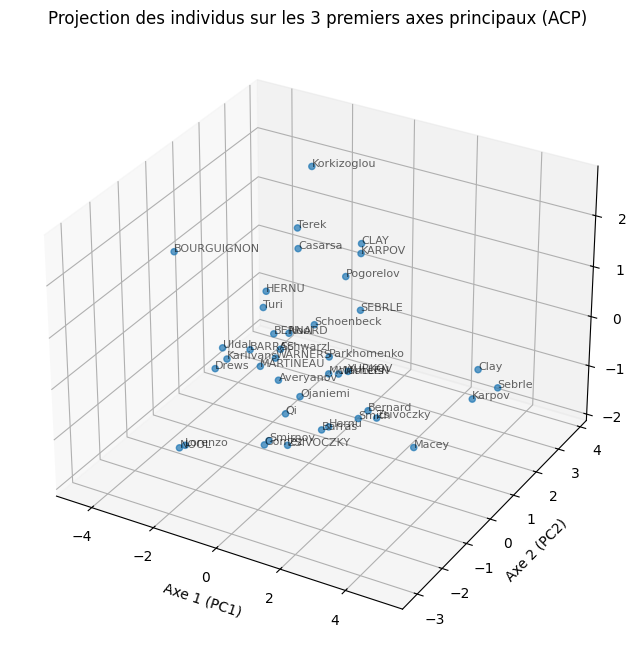

Individus qui contribuent le plus à l'axe 3 (PC3) :
Korkizoglou (12.03%)
CLAY (8.29%)
Terek (8.23%)
KARPOV (7.22%)
Macey (5.67%)


In [35]:
# Projection des individus sur les trois premiers axes principaux (ACP)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.7)

for i, name in enumerate(df["Athlets"]):
    ax.text(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], name, fontsize=8, alpha=0.6)

ax.set_xlabel("Axe 1 (PC1)")
ax.set_ylabel("Axe 2 (PC2)")
ax.set_zlabel("Axe 3 (PC3)")
ax.set_title("Projection des individus sur les 3 premiers axes principaux (ACP)")
plt.show()

# Contribution des individus aux trois premiers axes
contrib_PC3 = (X_pca[:, 2] ** 2) / np.sum(X_pca[:, 2] ** 2)
top_PC3 = np.argsort(contrib_PC3)[::-1][:5]

print("Individus qui contribuent le plus à l'axe 3 (PC3) :")
for idx in top_PC3:
    print(f"{df['Athlets'].iloc[idx]} ({contrib_PC3[idx]*100:.2f}%)")

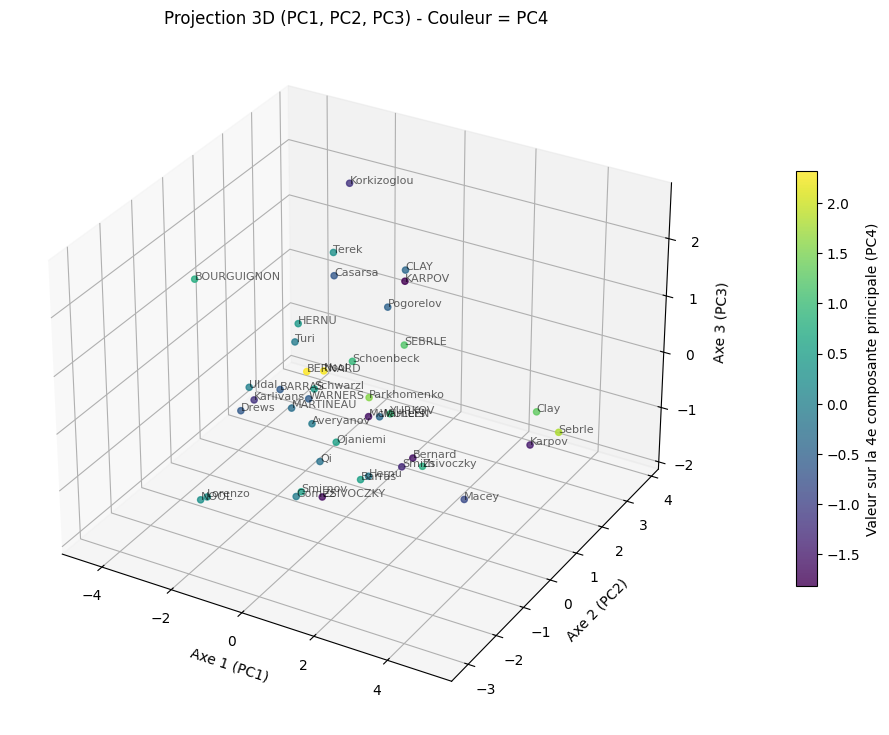

Individus qui contribuent le plus à l'axe 4 (PC4) :
BERNARD (12.01%)
Nool (11.48%)
KARPOV (7.37%)
Sebrle (7.34%)
ZSIVOCZKY (6.16%)


In [36]:
# Projection 3D des individus sur les trois premiers axes principaux
# Couleur des points selon la valeur sur la 4e composante principale (PC4)
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Utilisation de la 4e composante principale pour la couleur
pc4_values = X_pca[:, 3]
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=pc4_values, cmap='viridis', alpha=0.8)

for i, name in enumerate(df["Athlets"]):
    ax.text(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], name, fontsize=8, alpha=0.6)

ax.set_xlabel("Axe 1 (PC1)")
ax.set_ylabel("Axe 2 (PC2)")
ax.set_zlabel("Axe 3 (PC3)")
ax.set_title("Projection 3D (PC1, PC2, PC3) - Couleur = PC4")
cbar = plt.colorbar(sc, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label("Valeur sur la 4e composante principale (PC4)")
plt.show()

# Contribution des individus à la 4e composante principale (PC4)
contrib_PC4 = (X_pca[:, 3] ** 2) / np.sum(X_pca[:, 3] ** 2)
top_PC4 = np.argsort(contrib_PC4)[::-1][:5]

print("Individus qui contribuent le plus à l'axe 4 (PC4) :")
for idx in top_PC4:
    print(f"{df['Athlets'].iloc[idx]} ({contrib_PC4[idx]*100:.2f}%)")

### 6. Qualité de représentation

In [37]:
# Qualité de représentation des variables (cos²) sur le plan factoriel (axes 1 et 2)
# cos² = somme des carrés des coordonnées sur les axes / norme du vecteur
cos2_vars = eigvecs_sorted[:, 0]**2 + eigvecs_sorted[:, 1]**2

print("Qualité de représentation des variables (cos², axes 1 et 2) :")
for var, cos2 in zip(quant_vars, cos2_vars):
    print(f"{var}: {cos2:.2f}")

# Variables bien représentées : cos² proche de 1
# Variables mal représentées : cos² faible²

# Qualité de représentation des individus (cos²) sur le plan factoriel (axes 1 et 2)
# Pour chaque individu : cos² = (coord_PC1² + coord_PC2²) / (somme des coord² sur toutes les CP)
cos2_ind = (X_pca[:, 0]**2 + X_pca[:, 1]**2) / np.sum(X_pca**2, axis=1)

print("\nIndividus les mieux représentés (cos² élevé, axes 1 et 2) :")
top_ind = np.argsort(cos2_ind)[::-1][:5]
for idx in top_ind:
    print(f"{df['Athlets'].iloc[idx]} (cos²={cos2_ind[idx]:.2f})")

print("\nIndividus les moins bien représentés (cos² faible, axes 1 et 2) :")
bottom_ind = np.argsort(cos2_ind)[:5]
for idx in bottom_ind:
    print(f"{df['Athlets'].iloc[idx]} (cos²={cos2_ind[idx]:.2f})")

# Limites d'interprétation :
# - Les variables ou individus mal représentés sur le plan (cos² faible) ne doivent pas être interprétés à partir de ce plan.
# - Pour ces cas, il faut regarder d'autres axes ou la représentation multidimensionnelle.

Qualité de représentation des variables (cos², axes 1 et 2) :
100m: 0.15
Long.jump: 0.20
Shot.put: 0.30
High.jump: 0.15
400m: 0.29
110m.hurdle: 0.15
Discus: 0.28
Pole.vault: 0.02
Javeline: 0.08
1500m: 0.13
Points: 0.23

Individus les mieux représentés (cos² élevé, axes 1 et 2) :
Casarsa (cos²=0.95)
Warners (cos²=0.89)
BOURGUIGNON (cos²=0.88)
Karpov (cos²=0.85)
Sebrle (cos²=0.85)

Individus les moins bien représentés (cos² faible, axes 1 et 2) :
Schoenbeck (cos²=0.02)
Barras (cos²=0.03)
McMULLEN (cos²=0.04)
Terek (cos²=0.08)
Qi (cos²=0.11)


### 7. Synthèse de résultats

## Partie 2 : Analyse du dataset *digits*

### 1. Chargement et visualisation des données

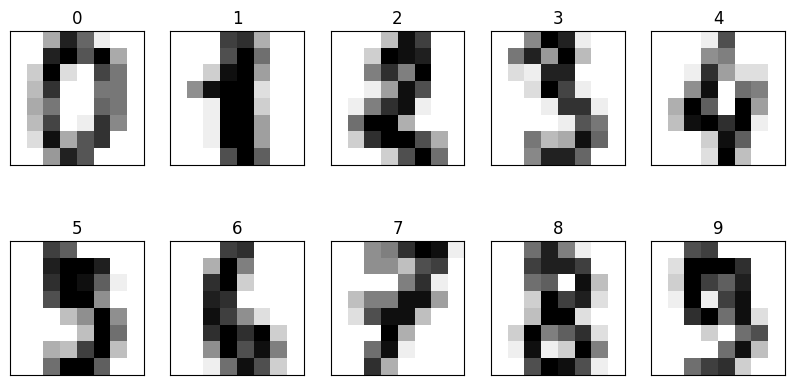

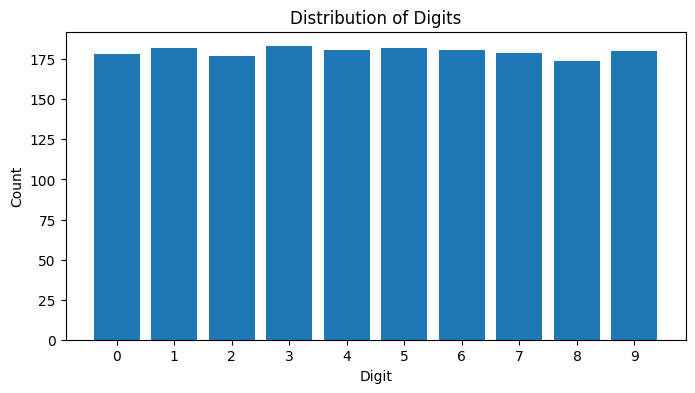

In [38]:
# Load the digits dataset
digits = load_digits()

# Display some images with labels
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5),
                         subplot_kw={'xticks': [], 'yticks': []})
for ax, image, label in zip(axes.flat, digits.images, digits.target):
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(label)
plt.show()

# Display the distribution of classes
class_distribution = np.bincount(digits.target)
plt.figure(figsize=(8, 4))
plt.bar(range(len(class_distribution)), class_distribution)
plt.xticks(range(len(class_distribution)))
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Distribution of Digits')
plt.show()

### 2. Prétraitement

In [39]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data)
y = digits.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

print("Shape of training data (X_train):", X_train.shape)
print("Shape of testing data (X_test):", X_test.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing labels (y_test):", y_test.shape)


Shape of training data (X_train): (1257, 64)
Shape of testing data (X_test): (540, 64)
Shape of training labels (y_train): (1257,)
Shape of testing labels (y_test): (540,)


### 3. Classification sans ACP

In [40]:
# Train an RBF SVM classifier
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# Evaluate the classifier on the test set
y_pred = svm_rbf.predict(X_test)

# Print the classification report
print("Classification Report for RBF SVM on original data:")
print(classification_report(y_test, y_pred))

Classification Report for RBF SVM on original data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.93      1.00      0.96        50
           2       1.00      0.98      0.99        55
           3       0.98      0.98      0.98        51
           4       0.93      0.98      0.95        51
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        57
           7       0.96      0.96      0.96        54
           8       1.00      0.89      0.94        55
           9       0.98      0.98      0.98        63

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



### 4. Réduction de dimension avec ACP

In [41]:
# Appliquer l’ACP sur les données d’entraînement
pca = PCA()
pca.fit(X_train)

# Calculer la variance expliquée cumulée
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Choisir k pour expliquer au moins 90% de la variance
k = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Nombre de composantes pour expliquer au moins 90% de la variance : {k}")

# Transformer les données d’entraînement et de test
pca_k = PCA(n_components=k)
X_train_pca = pca_k.fit_transform(X_train)
X_test_pca = pca_k.transform(X_test)

print("Shape de X_train_pca :", X_train_pca.shape)
print("Shape de X_test_pca :", X_test_pca.shape)

Nombre de composantes pour expliquer au moins 90% de la variance : 30
Shape de X_train_pca : (1257, 30)
Shape de X_test_pca : (540, 30)


### 5. Classification après ACP

In [42]:
# Réentraîner le classifieur SVM sur les données réduites par ACP
svm_rbf_pca = SVC(kernel='rbf')
svm_rbf_pca.fit(X_train_pca, y_train)

# Prédire sur le jeu de test réduit
y_pred_pca = svm_rbf_pca.predict(X_test_pca)

# Afficher le rapport de classification
print("Classification Report for RBF SVM after PCA:")
print(classification_report(y_test, y_pred_pca))

Classification Report for RBF SVM after PCA:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.91      1.00      0.95        50
           2       0.98      0.98      0.98        55
           3       0.98      0.98      0.98        51
           4       0.93      0.98      0.95        51
           5       1.00      0.98      0.99        48
           6       1.00      1.00      1.00        57
           7       0.96      0.96      0.96        54
           8       0.96      0.89      0.92        55
           9       0.98      0.94      0.96        63

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



### 6. Visualisation

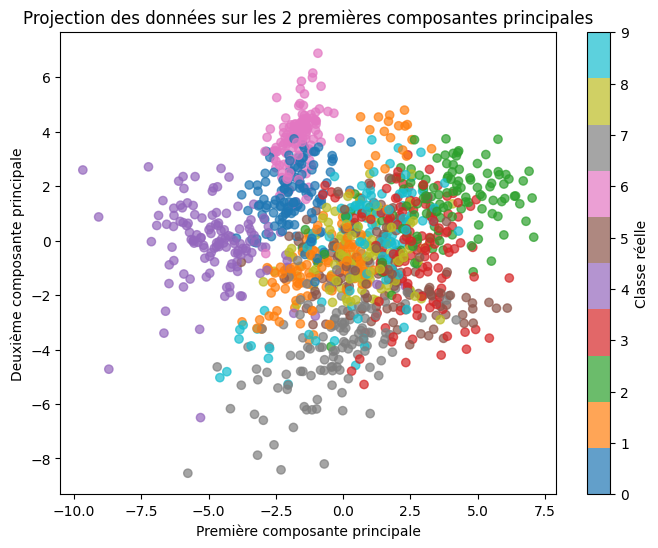

In [43]:
# Réduire les données à 2 composantes principales pour la visualisation
pca_2 = PCA(n_components=2)
X_train_pca2 = pca_2.fit_transform(X_train)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1], c=y_train, cmap='tab10', alpha=0.7)
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('Projection des données sur les 2 premières composantes principales')
plt.colorbar(scatter, label='Classe réelle')
plt.show()